In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [18]:
model = torch.load('../data_storage/CNN_L8_N100.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-1.5317, -1.6617, -0.0579],
                        [-1.5560, -1.7892, -0.7167],
                        [-0.6388, -1.2739, -0.3740]]],
              
              
                      [[[-0.9322, -0.5486, -0.8006],
                        [-1.0460,  0.6278, -0.1579],
                        [ 0.9571,  1.5994,  0.3010]]],
              
              
                      [[[ 0.7854,  2.0423,  1.6980],
                        [ 0.7778,  1.9961, -1.2233],
                        [-0.5185,  2.5388,  0.5904]]],
              
              
                      [[[ 1.4119,  1.7379,  1.5606],
                        [ 2.0832,  2.1449,  2.0250],
                        [-0.5654, -0.7334, -0.6832]]],
              
              
                      [[[ 0.6895, -0.6717, -0.6581],
                        [-1.2987, -1.8426, -0.9540],
                        [-0.6770, -1.5600, -2.0742]]]])),
             ('fc.0.weight',
            

In [19]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-1.5317, -1.6617, -0.0579],
          [-1.5560, -1.7892, -0.7167],
          [-0.6388, -1.2739, -0.3740]]],


        [[[-0.9322, -0.5486, -0.8006],
          [-1.0460,  0.6278, -0.1579],
          [ 0.9571,  1.5994,  0.3010]]],


        [[[ 0.7854,  2.0423,  1.6980],
          [ 0.7778,  1.9961, -1.2233],
          [-0.5185,  2.5388,  0.5904]]],


        [[[ 1.4119,  1.7379,  1.5606],
          [ 2.0832,  2.1449,  2.0250],
          [-0.5654, -0.7334, -0.6832]]],


        [[[ 0.6895, -0.6717, -0.6581],
          [-1.2987, -1.8426, -0.9540],
          [-0.6770, -1.5600, -2.0742]]]])

In [20]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

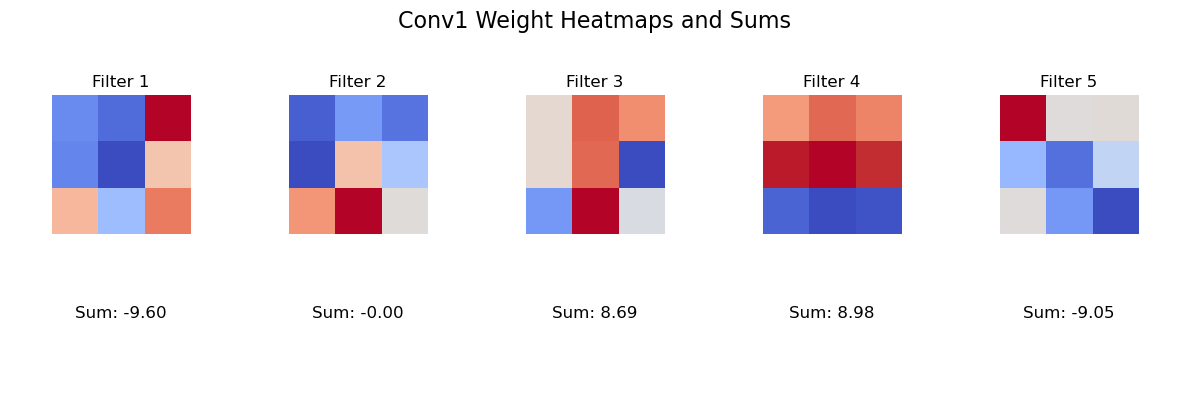

In [21]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [22]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.1167,  0.0056,  0.0277,  ...,  0.0513, -0.1133, -0.0874],
        [ 0.0097, -0.1387,  0.3705,  ..., -0.1515, -0.2422,  0.0807],
        [-0.2878, -0.1570, -0.5315,  ...,  0.1167,  0.0851, -0.0690],
        ...,
        [-0.0983, -0.0901, -0.0518,  ...,  0.0255, -0.0728, -0.1438],
        [-0.1045, -0.0082, -0.0440,  ..., -0.1711, -0.0324, -0.1287],
        [-0.0125,  0.1065, -0.0041,  ...,  0.1252,  0.0924,  0.0790]])

In [23]:
fc_weight.size()

torch.Size([100, 80])

In [24]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [25]:
fc_weight_np_square

array([[ 0.11670447,  0.00974116, -0.28779   , ..., -0.09828626,
        -0.1045166 , -0.01245547],
       [ 0.00562448, -0.13868815, -0.1569976 , ..., -0.0901057 ,
        -0.00824074,  0.10650812],
       [ 0.02774098,  0.370512  , -0.5315394 , ..., -0.05178645,
        -0.04403514, -0.00411404],
       ...,
       [ 0.05127524, -0.15145035,  0.11667447, ...,  0.02550453,
        -0.17111056,  0.12518983],
       [-0.11325975, -0.24215207,  0.08505678, ..., -0.07283279,
        -0.03241479,  0.09242392],
       [-0.08737685,  0.08069248, -0.06900886, ..., -0.1438267 ,
        -0.12870595,  0.07903913]], dtype=float32)

In [26]:
fc_weight_np_square.shape

(80, 100)

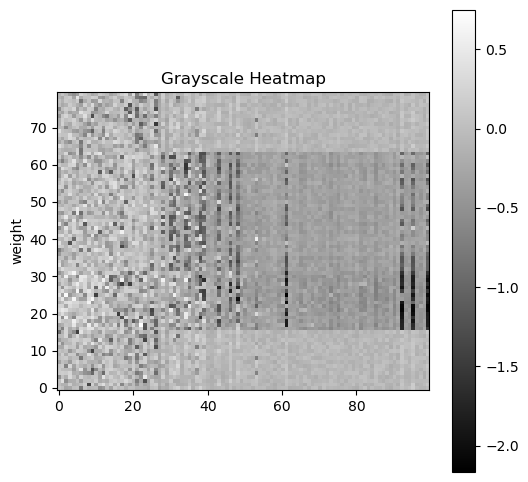

In [27]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [28]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -3.6709678 ,  -3.1451054 ,   0.36454254,  -2.418109  ,
        -2.3872986 ,  -3.1119108 ,  -8.27457   ,  -2.4865012 ,
        -3.3229356 ,  -5.0426598 ,  -6.9893627 ,  -7.2762914 ,
        -5.05852   ,  -4.8135295 ,  -9.0353775 ,  -5.281328  ,
        -6.032954  ,  -8.981577  , -11.502122  , -12.094904  ,
        -6.2094116 , -13.705984  , -10.26804   , -11.719399  ,
       -11.892163  , -14.03821   , -15.943578  , -12.717979  ,
       -11.755909  , -12.974432  , -20.886494  , -18.048903  ,
       -16.93238   , -14.114532  , -19.66533   , -21.129356  ,
       -15.605261  , -17.185276  , -28.92664   , -27.671984  ,
       -16.97609   , -16.013145  , -20.063883  , -31.759804  ,
       -16.583958  , -18.24282   , -33.2638    , -17.410637  ,
       -36.02588   , -20.2126    , -18.711535  , -17.578932  ,
       -18.525528  , -20.15525   , -19.970387  , -18.079826  ,
       -18.520193  , -16.860506  , -16.0041    , -19.273788  ,
       -19.574486  , -43.021057  , -16.65261   , -17.91

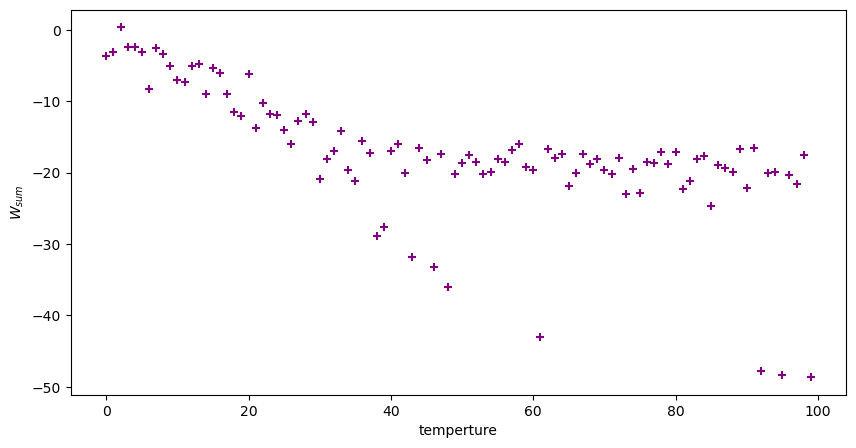

In [29]:
x = [x for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [30]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.041666666666666664,
 0.04,
 0.038461538461538464,
 0.037037037037037035,
 0.03571428571428571,
 0.034482758620689655,
 0.03333333333333333,
 0.03225806451612903,
 0.03125,
 0.030303030303030304,
 0.029411764705882353,
 0.02857142857142857,
 0.027777777777777776,
 0.02702702702702703,
 0.02631578947368421,
 0.02564102564102564,
 0.025,
 0.024390243902439025,
 0.023809523809523808,
 0.023255813953488372,
 0.022727272727272728,
 0.022222222222222223,
 0.021739130434782608,
 0.02127659574468085,
 0.020833333333333332,
 0.02040816326530612,
 0.02,
 0.0196078431372549,
 0.019230769230769232,
 0.0188679245

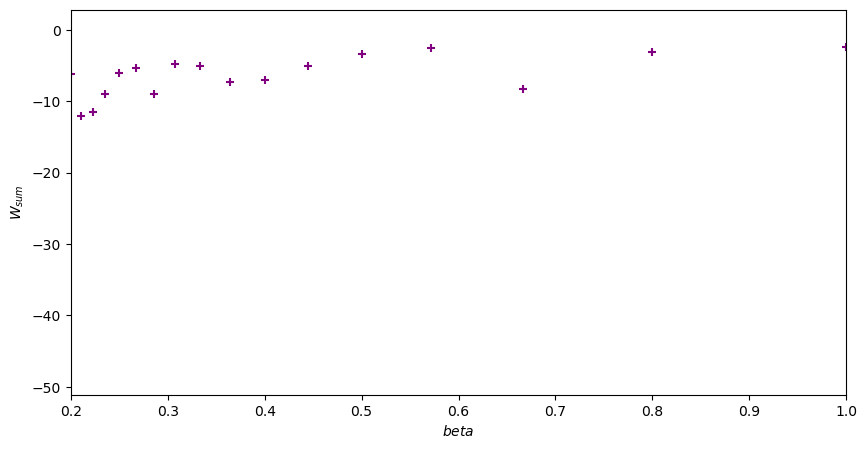

In [31]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()